In [20]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
url="https://www.denvergov.org/media/gis/DataCatalog/police_pedestrian_stops_and_vehicle_stops/csv/police_pedestrian_stops_and_vehicle_stops.csv"
df = pd.read_csv(url)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [72]:
df.head(5)

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME,Year,Month
0,DPD-12-0528225,P3 Public Need,Vehicle Stop,8500 W CRESTLINE AVE,2,2012-11-13 00:02:22,K - Street Check Completed,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,11
1,DPD-12-0147770,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-04-11 00:22:38,Arrest Made,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,04
2,DPD-12-0306079,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-10 00:29:19,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,07
3,DPD-12-0331882,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-24 04:40:57,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,07
4,DPD-15-0647708,P3 Public Need,Subject Stop,8500 W Crestline Ave,2,2015-11-05 00:37:02,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2015,11


In [9]:
# To provide a basic summary of the data, we use describe function

df.describe()

,CALL_CLASS,GEO_X,GEO_Y,GEO_LON,GEO_LAT
count,965287.000000,9.652870e+05,9.652870e+05,965287.000000,965287.000000
mean,1.999010,3.149611e+06,1.693494e+06,-104.968011,39.736223
std,0.040034,1.829676e+04,1.306210e+04,0.065165,0.035751
min,0.000000,3.079311e+06,1.630241e+06,-105.217937,39.563078
25%,2.000000,3.135000e+06,1.684357e+06,-105.020362,39.711229
50%,2.000000,3.144168e+06,1.694906e+06,-104.987445,39.740155
75%,2.000000,3.160839e+06,1.703344e+06,-104.928178,39.763248
max,2.000000,3.257766e+06,1.784032e+06,-104.583297,39.985556


In [71]:
print(df.shape)

(965287, 16)


In [14]:
#After importing and displaying the data, I wanted to know the types of vehicle and person stops made by Denver Police

df.CALL_DISPOSITION.value_counts().iloc[:10]

T - Citation Issued           287247
Party Advised                 212386
Arrest Made                   113255
Warning Issued                109938
K - Street Check Completed     69564
In Service                     39941
Back Up / Cover Car            37116
File Only                      20380
Quit                           16373
Report Made                    15722
Name: CALL_DISPOSITION, dtype: int64

<AxesSubplot:>

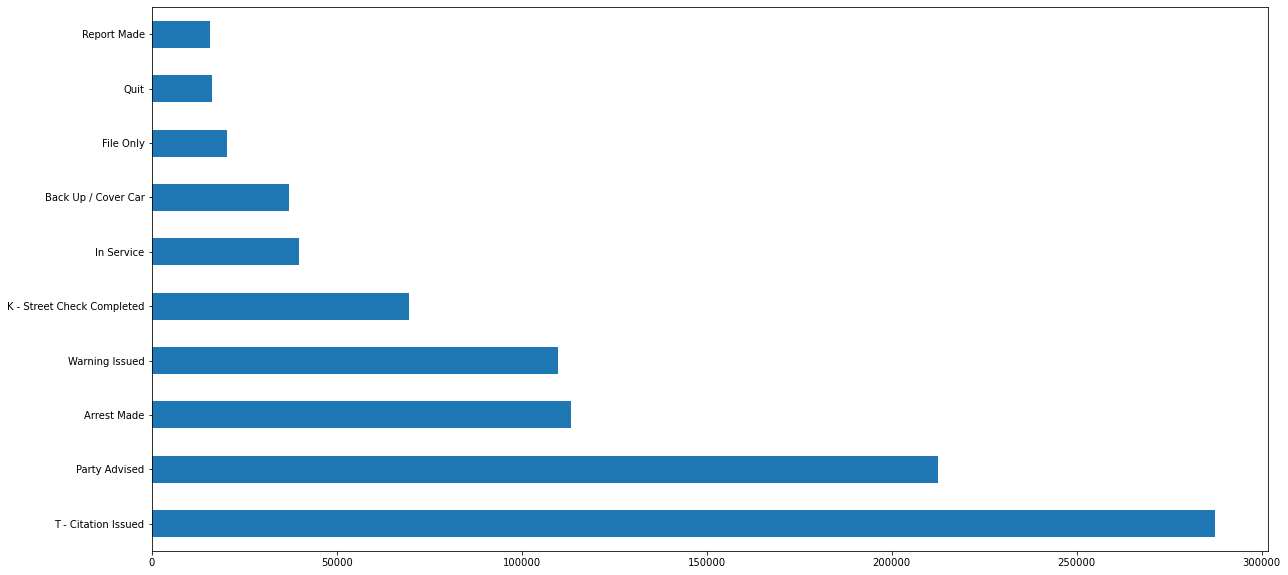

In [62]:
#Visualizing the data

df.CALL_DISPOSITION.value_counts().iloc[:10].plot(kind="barh", figsize=(20,10))

In [13]:
#Displaying top 10 neighborhoods with most incidents

df.groupby("NEIGHBORHOOD_NAME").size().sort_values(ascending = False).head(10)

NEIGHBORHOOD_NAME
Five Points    50256
Montbello      46130
Stapleton      38157
West Colfax    36301
Globeville     32564
East Colfax    31010
Westwood       30391
Baker          29408
CBD            28618
Barnum         27191
dtype: int64

<AxesSubplot:ylabel='NEIGHBORHOOD_NAME'>

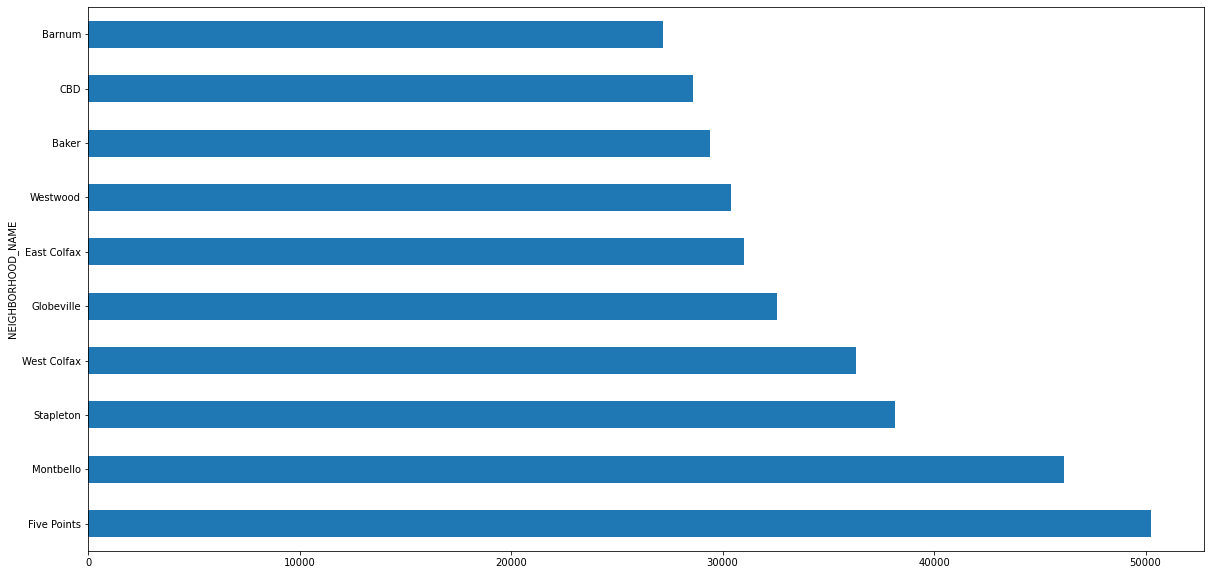

In [61]:
#Visualizing the Displayed top 10 neighborhoods with most incidents

df.groupby("NEIGHBORHOOD_NAME").size().sort_values(ascending = False).head(10).plot(kind="barh", figsize=(20,10))

In [26]:
#Creating a seperate dataframe for Five Points as it's the most eventful neighborhood

fivepoints = df[df.NEIGHBORHOOD_NAME.str.contains("Five Points")]
fivepoints.head()

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME
349377,DPD-12-0441184,P3 Public Need,Subject Stop,PARK AVE / N DOWNING ST,2,2012-09-22 10:50:42,Arrest Made,3148087.45,1696231.36,-104.973383,39.74378,6,621,Five Points
349378,DPD-13-0105898,P3 Public Need,Subject Stop,PARK AVE / N DOWNING ST,2,2013-03-06 09:32:10,File Only,3148087.45,1696231.36,-104.973383,39.74378,6,621,Five Points
349379,DPD-15-0743260,P3 Public Need,Vehicle Stop,N Downing St / Park Ave,2,2015-12-23 12:14:05,1 - Alarm RP On Scene,3148087.45,1696231.36,-104.973383,39.74378,6,621,Five Points
349380,DPD-14-0465943,P3 Public Need,Vehicle Stop,N Downing St / Park Ave,2,2014-09-03 17:41:46,Warning Issued,3148087.45,1696231.36,-104.973383,39.74378,6,621,Five Points
349381,DPD-17-0830754,P3 Public Need,Vehicle Stop,N Downing St / Park Ave,2,2017-12-12 23:54:20,T - Citation Issued,3148087.45,1696231.36,-104.973383,39.74378,6,621,Five Points


In [30]:
#Exporting the Five Points neighborhood data into a seperate csv file

fivepoints.to_csv(r'C:\Users\HP\Downloads\fivepoints.csv', index=False)

In [36]:
df['Year']=[d.split('-')[0] for d in df.TIME_PHONEPICKUP]
df['Month']=[d.split('-')[1] for d in df.TIME_PHONEPICKUP]

df.head(5)

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME,Year,Month,Day
0,DPD-12-0528225,P3 Public Need,Vehicle Stop,8500 W CRESTLINE AVE,2,2012-11-13 00:02:22,K - Street Check Completed,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,11,13 00:02:22
1,DPD-12-0147770,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-04-11 00:22:38,Arrest Made,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,04,11 00:22:38
2,DPD-12-0306079,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-10 00:29:19,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,07,10 00:29:19
3,DPD-12-0331882,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-24 04:40:57,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,07,24 04:40:57
4,DPD-15-0647708,P3 Public Need,Subject Stop,8500 W Crestline Ave,2,2015-11-05 00:37:02,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2015,11,05 00:37:02


In [38]:
df.head(10)

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME,Year,Month,Day
0,DPD-12-0528225,P3 Public Need,Vehicle Stop,8500 W CRESTLINE AVE,2,2012-11-13 00:02:22,K - Street Check Completed,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,11,13 00:02:22
1,DPD-12-0147770,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-04-11 00:22:38,Arrest Made,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,04,11 00:22:38
2,DPD-12-0306079,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-10 00:29:19,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,07,10 00:29:19
3,DPD-12-0331882,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-24 04:40:57,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,07,24 04:40:57
4,DPD-15-0647708,P3 Public Need,Subject Stop,8500 W Crestline Ave,2,2015-11-05 00:37:02,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2015,11,05 00:37:02
5,DPD-11-0224335,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2011-05-24 23:47:04.000001,K - Street Check Completed,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2011,05,24 23:47:04.000001
6,DPD-11-0388613,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2011-08-30 23:11:42,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2011,08,30 23:11:42
7,DPD-12-0371454,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-08-14 23:16:20,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,08,14 23:16:20
8,DPD-12-0324205,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-20 00:56:19.000001,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,07,20 00:56:19.000001
9,DPD-11-0542737,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2011-12-15 23:58:32,In Service,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2011,12,15 23:58:32


In [42]:
df.drop(["Day"], axis=1, inplace = True)

In [43]:
df.head(10)

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME,Year,Month
0,DPD-12-0528225,P3 Public Need,Vehicle Stop,8500 W CRESTLINE AVE,2,2012-11-13 00:02:22,K - Street Check Completed,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,11
1,DPD-12-0147770,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-04-11 00:22:38,Arrest Made,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,04
2,DPD-12-0306079,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-10 00:29:19,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,07
3,DPD-12-0331882,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-24 04:40:57,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,07
4,DPD-15-0647708,P3 Public Need,Subject Stop,8500 W Crestline Ave,2,2015-11-05 00:37:02,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2015,11
5,DPD-11-0224335,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2011-05-24 23:47:04.000001,K - Street Check Completed,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2011,05
6,DPD-11-0388613,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2011-08-30 23:11:42,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2011,08
7,DPD-12-0371454,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-08-14 23:16:20,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,08
8,DPD-12-0324205,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2012-07-20 00:56:19.000001,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2012,07
9,DPD-11-0542737,P3 Public Need,Subject Stop,8500 W CRESTLINE AVE,2,2011-12-15 23:58:32,In Service,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2011,12


In [73]:
#The number of incidents over time

df.groupby("Year").size().sort_values(ascending = False)

Year
2018    134362
2017    132154
2016    115926
2019    105235
2014     80474
2012     80167
2015     76563
2013     72252
2011     70066
2020     69874
2021     28092
2010       122
dtype: int64

<AxesSubplot:xlabel='Year'>

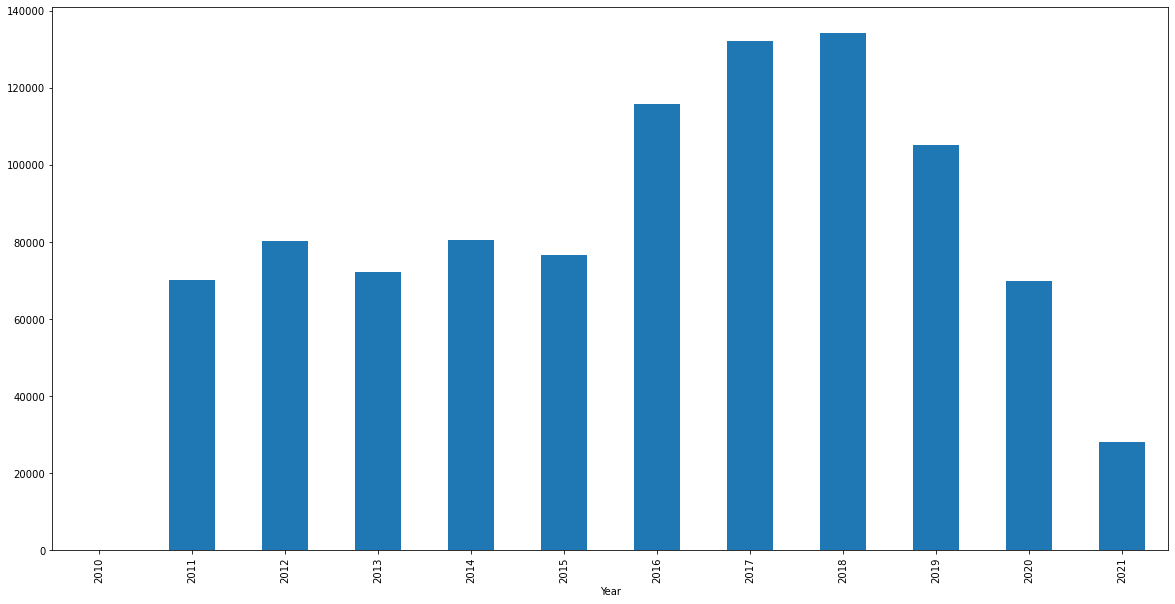

In [60]:
#Visualizing the incidents over time

df.groupby("Year").size().plot(kind='bar', figsize=(20,10))

In [63]:
mostinc = df[df.Year.str.contains("2018")]
mostinc.head()

,MASTER_INCIDENT_NUMBER,PRIORITY_DESCRIPTION,PROBLEM,ADDRESS,CALL_CLASS,TIME_PHONEPICKUP,CALL_DISPOSITION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_NAME,Year,Month
14,DPD-18-0042300,P3 Public Need,Vehicle Stop,8500 W Crestline Ave,2,2018-01-18 12:13:31,Party Advised,3114742.65,1650362.34,-105.092691,39.618329,4,423,Marston,2018,01
60,DPD-18-0217083,P3 Public Need,Vehicle Stop,I25 Hwy_sb / I225 Hwy_sb,2,2018-04-02 07:05:53,Warning Issued,3167560.05,1654761.89,-104.905104,39.629607,3,324,Southmoor Park,2018,04
77,DPD-18-0076778,P3 Public Need,Vehicle Stop,4600 S Monaco St,2,2018-02-01 13:41:00.000001,Party Advised,3165826.63,1654895.57,-104.911255,39.630005,3,324,Southmoor Park,2018,02
78,DPD-18-0105245,P3 Public Need,Vehicle Stop,4600-blk S Monaco St,2,2018-02-13 14:59:13,T - Citation Issued,3165826.63,1654895.57,-104.911255,39.630005,3,324,Southmoor Park,2018,02
80,DPD-18-0143447,P3 Public Need,Vehicle Stop,4600-blk S Monaco St,2,2018-03-01 14:48:00,T - Citation Issued,3165826.63,1654895.57,-104.911255,39.630005,3,324,Southmoor Park,2018,03


<AxesSubplot:ylabel='CALL_DISPOSITION'>

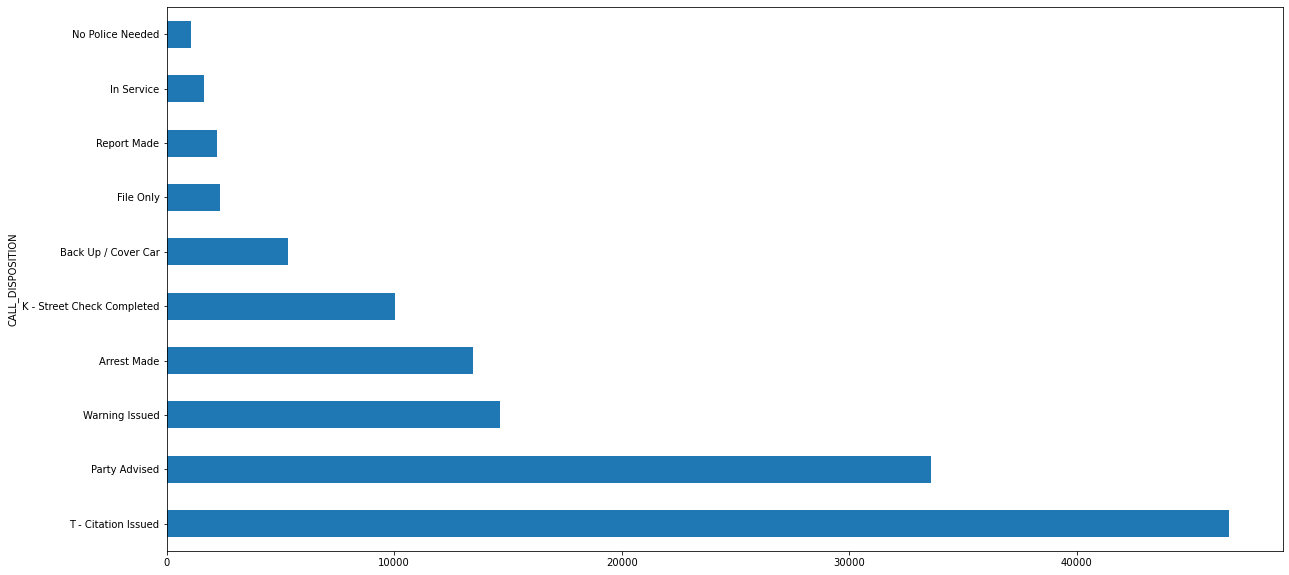

In [68]:
mostinc.groupby("CALL_DISPOSITION").size().sort_values(ascending = False).head(10).plot(kind='barh', figsize=(20,10))

In [69]:
mostinc.groupby("CALL_DISPOSITION").size().sort_values(ascending = False)

CALL_DISPOSITION
T - Citation Issued               46710
Party Advised                     33603
Warning Issued                    14643
Arrest Made                       13464
K - Street Check Completed        10017
                                  ...  
Evidence / Property,Warning Is        1
Party Advised,Y - Broadcast           1
Detox Van,In Service                  1
CIT Report,K - Street Check Co        1
File Only,Supervisor Cancelled        1
Length: 87, dtype: int64